In [1]:
import spacy
import pandas as pd

import json
import spacy
import requests
import random
import time

import spacy
from tqdm import tqdm 
from collections import Counter

import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer

/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/express/imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/graph_objs/__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/graph_objs/__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/lydiafield/anaconda3/lib/python3.11/site-packages/plotly/graph_objs/__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/Users/lydiafield/anaconda3/

In [64]:
florida = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/fl_tweet.csv')
california = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/ca_tweet.csv')
new_york = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/ny_tweet.csv')
missouri = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/mo_tweet.csv')
massachussetts = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/ma_tweet.csv')
utah = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/ut_tweet.csv')
pennsylvania = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/pa_tweet.csv')
texas = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/tx_tweet.csv')
washington = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/wa_tweet.csv')
illinois = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/il_tweet.csv')
blue = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/blue_states.csv')
red = pd.read_csv('/Users/lydiafield/Desktop/Semestre 1/Digital Methods/red_states.csv')

In [65]:
fl_date = florida.set_index(pd.to_datetime(florida['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
ca_date = california.set_index(pd.to_datetime(california['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
ny_date = new_york.set_index(pd.to_datetime(new_york['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
mo_date = missouri.set_index(pd.to_datetime(missouri['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
ma_date = massachussetts.set_index(pd.to_datetime(massachussetts['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
ut_date = utah.set_index(pd.to_datetime(utah['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
pa_date = pennsylvania.set_index(pd.to_datetime(pennsylvania['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
tx_date = texas.set_index(pd.to_datetime(texas['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
wa_date = washington.set_index(pd.to_datetime(washington['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
il_date = illinois.set_index(pd.to_datetime(illinois['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
blue_date = blue.set_index(pd.to_datetime(blue['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})
red_date = red.set_index(pd.to_datetime(red['Date'])).resample('M').agg({'URL':'count','Engagement':'sum'})

In [66]:
fl_date = fl_date.rename(columns={'URL':'Post Count'})
ca_date = ca_date.rename(columns={'URL':'Post Count'})
ny_date = ny_date.rename(columns={'URL':'Post Count'})
mo_date = mo_date.rename(columns={'URL':'Post Count'})
ma_date = ma_date.rename(columns={'URL':'Post Count'})
ut_date = ut_date.rename(columns={'URL':'Post Count'})
pa_date = pa_date.rename(columns={'URL':'Post Count'})
tx_date = tx_date.rename(columns={'URL':'Post Count'})
wa_date = wa_date.rename(columns={'URL':'Post Count'})
il_date = il_date.rename(columns={'URL':'Post Count'})
blue_date = blue_date.rename(columns={'URL':'Post Count'})
red_date = red_date.rename(columns={'URL':'Post Count'})

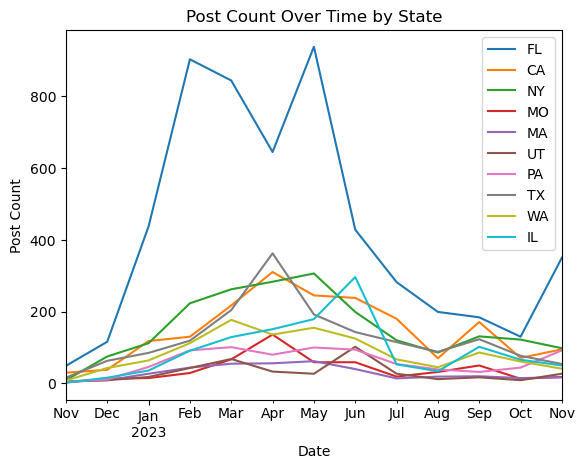

In [67]:
fl_date['Post Count'].plot()
ca_date['Post Count'].plot()
ny_date['Post Count'].plot()
mo_date['Post Count'].plot()
ma_date['Post Count'].plot()
ut_date['Post Count'].plot()
pa_date['Post Count'].plot()
tx_date['Post Count'].plot()
wa_date['Post Count'].plot()
il_date['Post Count'].plot()

plt.ylabel('Post Count')
plt.gca().legend(('FL','CA','NY','MO','MA','UT','PA','TX','WA','IL'))

plt.title("Post Count Over Time by State")
plt.savefig("all_states_time_count.png")

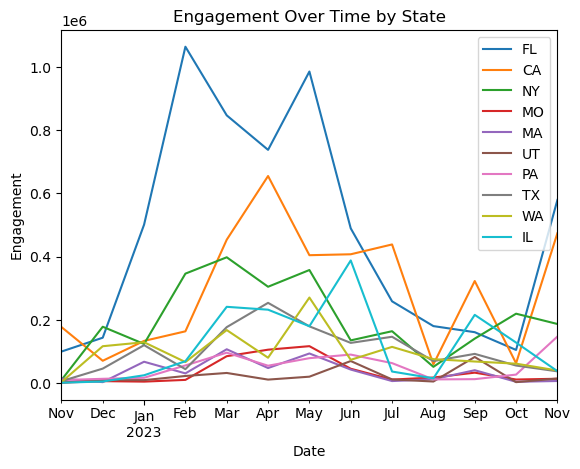

In [68]:
fl_date['Engagement'].plot()
ca_date['Engagement'].plot()
ny_date['Engagement'].plot()
mo_date['Engagement'].plot()
ma_date['Engagement'].plot()
ut_date['Engagement'].plot()
pa_date['Engagement'].plot()
tx_date['Engagement'].plot()
wa_date['Engagement'].plot()
il_date['Engagement'].plot()

plt.ylabel('Engagement')
plt.gca().legend(('FL','CA','NY','MO','MA','UT','PA','TX','WA','IL'))

plt.title("Engagement Over Time by State")
plt.savefig("all_states_time_engage.png")

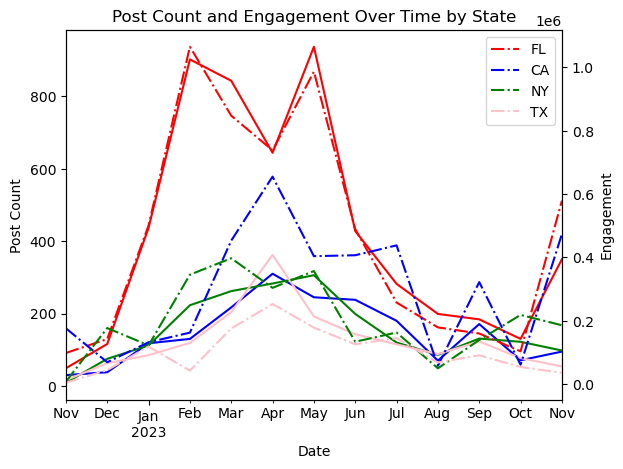

In [69]:
#top 4 states
fl_date['Post Count'].plot(color='red', ylabel='Post Count')
ca_date['Post Count'].plot(color='blue')
ny_date['Post Count'].plot(color='green')
tx_date['Post Count'].plot(color='pink')
fl_date['Engagement'].plot(color='red',linestyle='-.',secondary_y=True)
ca_date['Engagement'].plot(color='blue',linestyle='-.',secondary_y=True)
ny_date['Engagement'].plot(color='green',linestyle='-.',secondary_y=True)
tx_date['Engagement'].plot(color='pink',linestyle='-.',secondary_y=True)

plt.ylabel('Engagement')
plt.gca().legend(('FL','CA','NY','TX'))

plt.title("Post Count and Engagement Over Time by State")
plt.savefig("top_states_time.png")

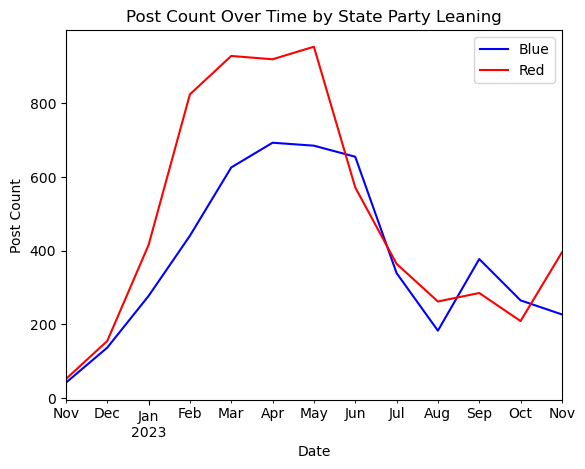

In [70]:
blue_date['Post Count'].plot(color='blue')
red_date['Post Count'].plot(color='red')

plt.ylabel('Post Count')
plt.gca().legend(('Blue','Red'))

plt.title("Post Count Over Time by State Party Leaning")
plt.savefig("red_blue_time_count.png")

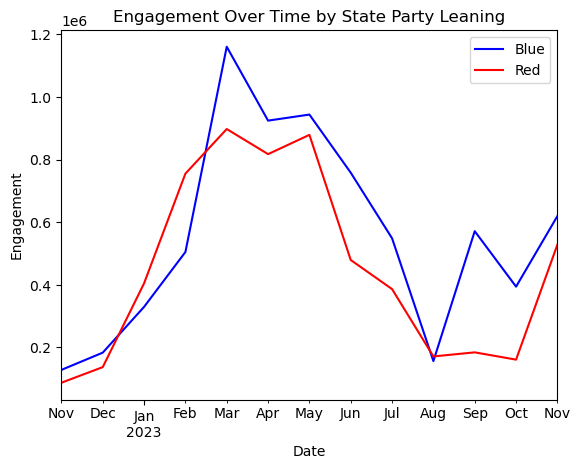

In [71]:
blue_date['Engagement'].plot(color='blue')
red_date['Engagement'].plot(color='red')

plt.ylabel('Engagement')
plt.gca().legend(('Blue','Red'))

plt.title("Engagement Over Time by State Party Leaning")
plt.savefig("red_blue_time_engage.png")

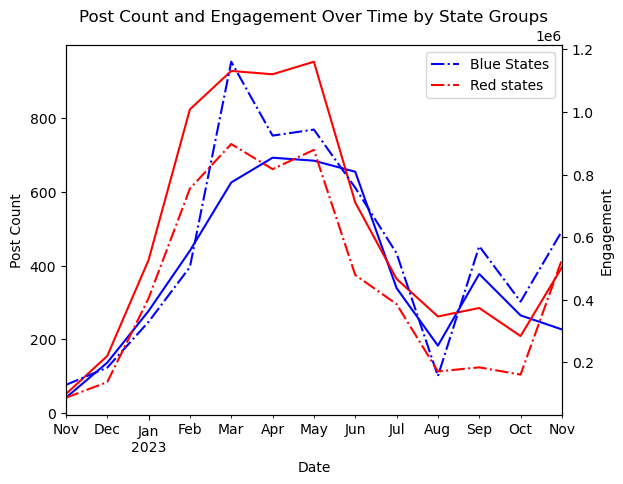

In [72]:
#posts and engagement for state groups
blue_date['Post Count'].plot(color='blue', ylabel='Post Count')
red_date['Post Count'].plot(color='red')
blue_date['Engagement'].plot(color='blue',linestyle='-.',secondary_y=True)
red_date['Engagement'].plot(color='red',linestyle='-.',secondary_y=True)

plt.ylabel('Engagement')
plt.gca().legend(('Blue States','Red states'))

plt.title("Post Count and Engagement Over Time by State Groups")
plt.savefig("red_blue_time.png")

In [73]:
blue_date_day = blue.set_index(pd.to_datetime(blue['Date'])).resample('D').agg({'URL':'count','Engagement':'sum'})
red_date_day = red.set_index(pd.to_datetime(red['Date'])).resample('D').agg({'URL':'count','Engagement':'sum'})
blue_date_day = blue_date_day.rename(columns={'URL':'Post Count'})
red_date_day = red_date_day.rename(columns={'URL':'Post Count'})

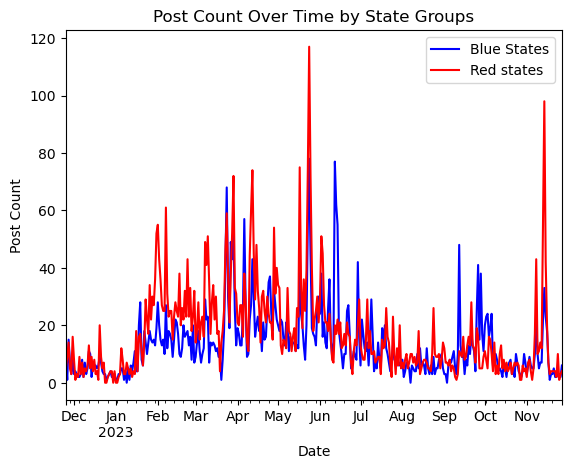

In [74]:
blue_date_day['Post Count'].plot(color='blue', ylabel='Post Count')
red_date_day['Post Count'].plot(color='red')

plt.ylabel('Post Count')
plt.gca().legend(('Blue States','Red states'))

plt.title("Post Count Over Time by State Groups")
plt.savefig("red_blue_day_count.png")